In [1]:
import numpy as np
from datetime import datetime
import pandas as pd 
import time
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from tqdm import tqdm
import warnings
import xlwt
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit  
from sklearn.preprocessing import StandardScaler    

### Load Data

In [3]:
# load the x data
df_x = pd.read_json("./x.json",encoding="utf-8")
# load the y data
df_y = pd.read_json("./y.json",encoding="utf-8")

In [4]:
# show df_x
df_x

,date,code,AR,ARBR,ATR14,ATR6,BR,MAWVAD,money_flow_20,PSY,...,EMA5,EMAC10,EMAC20,MAC10,MAC20,MAC5,MAC60,MACDC,MFI14,price_no_fq
0,2016-01-04,000001.XSHE,110.409767,25.644803,30.437857,29.033333,84.764964,-407161.365140,1.488764e+10,58.333333,...,1.046541,1.059017,1.068195,1.074086,1.066999,1.050498,1.053507,-0.013772,57.368374,11.33
1,2016-01-05,000001.XSHE,133.235675,32.318378,31.708571,33.403333,100.917298,-713159.294704,1.515273e+10,58.333333,...,1.026953,1.041909,1.055058,1.057316,1.056656,1.033443,1.046810,-0.017497,55.751228,11.40
2,2016-01-06,000001.XSHE,139.986358,33.275754,31.976429,28.563333,106.710604,-616696.534018,1.514257e+10,58.333333,...,1.010643,1.024741,1.039347,1.037976,1.043308,1.012405,1.035999,-0.017391,60.331501,11.53
3,2016-01-07,000001.XSHE,124.793163,32.442695,34.452143,36.213333,92.350467,-581030.864769,1.482092e+10,50.000000,...,1.043129,1.065157,1.086256,1.079817,1.094725,1.045642,1.091781,-0.024276,56.393160,10.94
4,2016-01-08,000001.XSHE,96.158562,14.735525,33.515714,39.805000,81.423037,-624083.124657,1.514966e+10,58.333333,...,1.017695,1.039558,1.062557,1.051693,1.073646,1.013318,1.074454,-0.024213,54.615205,11.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419986,2017-10-30,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419987,2017-10-31,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419988,2017-11-01,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419989,2017-11-02,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21


In [5]:
# show df_y
df_y

,date,code,close_0,close_1,close_5,change_5,change_5_class6
0,2016-01-04,000001.XSHE,8.72,8.77,8.28,-5.587229,2
1,2016-01-05,000001.XSHE,8.77,8.87,8.32,-6.200676,1
2,2016-01-06,000001.XSHE,8.87,8.42,8.24,-2.137767,2
3,2016-01-07,000001.XSHE,8.42,8.56,8.29,-3.154206,2
4,2016-01-08,000001.XSHE,8.56,8.28,8.05,-2.777778,2
...,...,...,...,...,...,...,...
419979,2021-09-15,603993.XSHG,7.88,7.59,6.82,-10.144928,1
419980,2021-09-16,603993.XSHG,7.59,7.28,6.25,-14.148352,1
419981,2021-09-17,603993.XSHG,7.28,7.17,6.24,-12.970711,1
419982,2021-09-22,603993.XSHG,7.17,7.13,5.90,-17.251052,1


### Pre_process Data

In [6]:
# record some important infor
attr_list = df_x.columns[2:]
print("number of attrs:",len(attr_list))
date_list = list(set(df_x.sort_values(by = ["date"],ascending = True)["date"].tolist()))
print("number of dates:",len(date_list))

number of attrs: 100
number of dates: 1400


In [7]:
# merge to a df
df = df_y[["date","code","change_5_class6"]]
df = pd.merge(df,df_x, how = "left", on=['date',"code"])
df["date"] = df["date"].astype("str")
df["date+code"] = df["date"] + df["code"]
df = df.sort_values(by = ["date","code"],ascending = True).reset_index(drop=True)
df

,date,code,change_5_class6,AR,ARBR,ATR14,ATR6,BR,MAWVAD,money_flow_20,...,EMAC10,EMAC20,MAC10,MAC20,MAC5,MAC60,MACDC,MFI14,price_no_fq,date+code
0,2016-01-04,000001.XSHE,2,110.409767,25.644803,30.437857,29.033333,84.764964,-4.071614e+05,1.488764e+10,...,1.059017,1.068195,1.074086,1.066999,1.050498,1.053507,-0.013772,57.368374,11.33,2016-01-04000001.XSHE
1,2016-01-04,000002.XSHE,4,312.139041,79.080897,65.299286,0.000000,233.058144,2.309413e+05,4.327219e+10,...,0.840825,0.772377,0.829881,0.742805,0.883960,0.619546,0.040482,82.748595,24.43,2016-01-04000002.XSHE
2,2016-01-04,000012.XSHE,1,98.126464,-26.912569,19.307857,17.405000,125.039033,-6.536162e+06,1.517055e+10,...,1.109035,1.072007,1.171313,1.057604,1.113364,0.924347,-0.022349,33.045483,12.02,2016-01-04000012.XSHE
3,2016-01-04,000027.XSHE,1,41.843723,-7.018343,5.064286,5.770000,48.862066,-1.141257e+06,4.974648e+09,...,1.111346,1.142363,1.130788,1.133758,1.099636,1.182364,-0.017570,45.792142,8.84,2016-01-04000027.XSHE
4,2016-01-04,000039.XSHE,1,107.936618,5.712969,23.883571,28.660000,102.223649,4.725451e+05,1.032765e+10,...,1.104506,1.101068,1.129907,1.095927,1.106506,1.057071,-0.016443,55.344783,19.05,2016-01-04000039.XSHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418484,2021-09-23,601998.XSHG,4,134.586466,34.586466,0.130714,0.140000,100.000000,-3.005437e+06,2.792454e+09,...,1.020880,1.023238,1.030482,1.024013,1.014035,1.028692,-0.007453,66.797598,4.56,2021-09-23601998.XSHG
418485,2021-09-23,603019.XSHG,2,85.265027,11.873144,2.497857,2.721667,73.391882,-6.313294e+06,9.515408e+09,...,1.011434,1.030726,1.018858,1.032641,0.991835,1.071730,-0.007758,54.387590,27.68,2021-09-23603019.XSHG
418486,2021-09-23,603288.XSHG,6,87.035920,42.629073,20.126429,20.596667,44.406846,-1.344370e+06,1.610087e+10,...,0.983878,1.026795,0.973793,1.020758,0.967766,1.198244,0.014243,51.241326,91.58,2021-09-23603288.XSHG
418487,2021-09-23,603806.XSHG,5,85.697999,0.094546,30.885714,29.653333,85.603452,-3.028309e+06,2.756114e+10,...,1.125779,1.152676,1.141486,1.206028,1.104321,1.085498,-0.058926,27.627275,118.04,2021-09-23603806.XSHG


### Data Makeup

In [8]:
# see the null
print("null:",df.isna().sum().tolist())

null: [0, 0, 0, 5767, 5770, 0, 0, 5672, 143, 0, 0, 294, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 525, 7675, 9209, 9098, 0, 0, 416, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6087, 0, 0, 6092, 3722, 0, 0, 0, 0, 0, 0, 0, 0, 1569, 0, 0, 0, 0, 0, 0, 0, 64329, 0, 0, 0, 16093, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 300, 0]


In [9]:
# use mean to makeup
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)

In [10]:
# see the null
print("null:",df.isna().sum().tolist())

null: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Split

In [11]:
# generate x,y
X = df.drop(["date","code","date+code","change_5_class6"], axis = 1)
y = df['change_5_class6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# split to train and test
# from 2016-01-04 to 2020-12-31; from 2021-01-04 to 2021-09-23
X_train = X[:365400]
y_train = y[:365400]
X_test = X[365400:]
y_test = y[365400:]

### Feature Selection

In [12]:
# copy data for feature selection
X_feature = X_train
X_feature = X_feature.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
y_feature = y_train
X_feature_array = X_feature.values
y_feature_array = y_feature.values

In [13]:
# l1 selection
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_feature_array, y_feature_array)
lasso_list = lasso.coef_
lasso_list = [abs(i) for i in lasso_list]

In [14]:
# l2 selection
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_feature_array, y_feature_array)
ridge_list = ridge.coef_
ridge_list = [abs(i) for i in ridge_list]

In [15]:
# ANOVA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
best_features = SelectKBest(score_func=f_classif,  k=100)
fit = best_features.fit(X_feature_array, y_feature_array)
ANOVA_list = fit.scores_
ANOVA_list = [abs(i) for i in ANOVA_list]

In [16]:
# feature group
# load the feature data
df_feature = pd.read_excel("./factors_1.xls")
df_feature = df_feature[["factor","category"]]
print(df_feature["category"].value_counts())
#dict_feature = dict(zip(df_feature['factor'],df_feature['category']))
df_feature.head()

emotion      30
momentum     29
style        21
technical    12
risk          8
Name: category, dtype: int64


,factor,category
0,AR,emotion
1,ARBR,emotion
2,ATR14,emotion
3,ATR6,emotion
4,BR,emotion


In [17]:
# add the importance to the feature
df_feature["l1"] = lasso_list
df_feature["l2"] = ridge_list
df_feature["ANOVA"] = ANOVA_list
df_feature["l1"] = df_feature["l1"].rank(method="first")
df_feature["l2"] = df_feature["l2"].rank(method="first")
df_feature["ANOVA"] = df_feature["ANOVA"].rank(method="first")
df_feature["final_para"] = (df_feature["l1"]+df_feature["l2"]+df_feature["ANOVA"])/3
df_feature["final_para"] = df_feature["final_para"].rank(method="first")
df_feature.head()
# select 
# df_feature[df_feature["category"] == "risk"].sort_values(by = ["final_para"],ascending = False)

,factor,category,l1,l2,ANOVA,final_para
0,AR,emotion,45.0,25.0,69.0,41.0
1,ARBR,emotion,46.0,19.0,6.0,14.0
2,ATR14,emotion,28.0,8.0,3.0,2.0
3,ATR6,emotion,1.0,6.0,2.0,1.0
4,BR,emotion,30.0,31.0,5.0,13.0


In [18]:
# select the proper features, 40
# emotion      10
# momentum     9
# style        10
# technical    6
# risk         5
feature_after_selection = ["turnover_volatility","TVSTD20","money_flow_20","PSY","TVSTD6","VOL20","VEMA5","VSTD10","AR","VOL5"\
                          ,"CR20","ROC20","PLRC24","CCI20","Rank1M","TRIX10","bear_power","Price1M","Volume1M"\
                          ,"beta","raw_beta","momentum","relative_strength","daily_standard_deviation","cumulative_range","liquidity","historical_sigma","earnings_yield","residual_volatility"\
                          ,"boll_down","MAC60","MAC5","EMA5","boll_up","MFI14"\
                          ,"Variance20","sharpe_ratio_60","Kurtosis60","Skewness20","Variance60"]
print("number of features:",len(feature_after_selection))
df_feature_after_selection = df_feature[df_feature["factor"].isin(feature_after_selection)].reset_index(drop=True)
print(df_feature_after_selection.shape)

number of features: 40
(40, 6)


### Split Again

In [19]:
# df2 is after feature selection
df2 = df.copy()
df2 = df2[["date","code","date+code","change_5_class6"]+feature_after_selection]
# generate x,y
X = df2.drop(["date","code","date+code","change_5_class6"], axis = 1)
y = df2['change_5_class6']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# split to train and test
# from 2016-01-04 to 2020-12-31; from 2021-01-04 to 2021-09-23
X_train = X[:365400]
y_train = y[:365400]
X_test = X[365400:]
y_test = y[365400:]
# set validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

### Train

In [20]:
# load model 
pre_model = None
#model_xgb_2 = xgb.Booster()
#model_xgb_2.load_model("./model/xgb.model")
#pre_model = model_xgb_2

#多分类
data_train = xgb.DMatrix(X_train, y_train)  # 使用XGBoost的原生版本需要对数据进行转化
data_val = xgb.DMatrix(X_val, y_val)
param = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    #'objective': 'binary:logistic', # 二分类的问题
    'num_class': 7,               # 类别数，与 multisoftmax 并用
    'gamma': 0.2,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。(可调)
    'max_depth': 3,               # 构建树的深度，越大越容易过拟合(可调)
    'lambda': 0.5,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。(可调)
    'alpha':10,                    # L1 regularization term on weights. Increasing this value will make model more conservative.
    'subsample': 0.7,              # 随机采样训练样本(可调)
    'colsample_bytree': 0.7,       # 生成树时进行的列采样(可调)
    'min_child_weight': 1,         # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1(可调)
    "max_delta_step":0,            # 最大增量步长，我们允许每个树的权重估计。(可调)
    "colsample_bytree":1,          # 生成树时进行的列采样。(可调)
    'eta': 0.2,                    # 如同学习率(可调)
    #"scale_pos_weight":1,         #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重(可调)
    'silent': 0,                   # 设置成1则没有运行信息输出，最好是设置为0。
    'nthread': 4,                  # cpu 线程数
    #"min_child_weight":1,          #最小子树
    "eval_metric":['mlogloss','merror'] 
}

watchlist = [(data_train, 'train'),(data_val, 'val')]
n_round = 100
evals_result={}
booster = xgb.train(param, data_train,num_boost_round = n_round,evals = watchlist,xgb_model = pre_model,evals_result=evals_result)
# save the model
booster.save_model('./xgb.model')

    

[16:23:14] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:1.88557	train-merror:0.72251	val-mlogloss:1.88630	val-merror:0.72419
[1]	train-mlogloss:1.84045	train-merror:0.72076	val-mlogloss:1.84159	val-merror:0.71965
[2]	train-mlogloss:1.80450	train-merror:0.71917	val-mlogloss:1.80603	val-merror:0.71884
[3]	train-mlogloss:1.77527	train-merror:0.71668	val-mlogloss:1.77715	val-merror:0.71646
[4]	train-mlogloss:1.75110	train-merror:0.71557	val-mlogloss:1.75328	val-merror:0.71594
[5]	train-mlogloss:1.73094	train-merror:0.71430	val-mlogloss:1.73342	val-merror:0.71549
[6]	train-mlogloss:1.71388	train-merror:0.71322	val-mlogloss:1.71657	val-merror:0.71367
[7]	train-mlogloss:1.69942	train-merror:0.71294	val-mloglo

[89]	train-mlogloss:1.57696	train-merror:0.68678	val-mlogloss:1.58979	val-merror:0.69350
[90]	train-mlogloss:1.57670	train-merror:0.68655	val-mlogloss:1.58964	val-merror:0.69358
[91]	train-mlogloss:1.57643	train-merror:0.68606	val-mlogloss:1.58950	val-merror:0.69342
[92]	train-mlogloss:1.57619	train-merror:0.68583	val-mlogloss:1.58934	val-merror:0.69327
[93]	train-mlogloss:1.57595	train-merror:0.68564	val-mlogloss:1.58916	val-merror:0.69338
[94]	train-mlogloss:1.57570	train-merror:0.68539	val-mlogloss:1.58903	val-merror:0.69302
[95]	train-mlogloss:1.57547	train-merror:0.68530	val-mlogloss:1.58888	val-merror:0.69271
[96]	train-mlogloss:1.57521	train-merror:0.68513	val-mlogloss:1.58875	val-merror:0.69287
[97]	train-mlogloss:1.57496	train-merror:0.68492	val-mlogloss:1.58857	val-merror:0.69272
[98]	train-mlogloss:1.57473	train-merror:0.68469	val-mlogloss:1.58844	val-merror:0.69308
[99]	train-mlogloss:1.57450	train-merror:0.68450	val-mlogloss:1.58833	val-merror:0.69268


sample number：73080
true number：22459
acc%：0.307


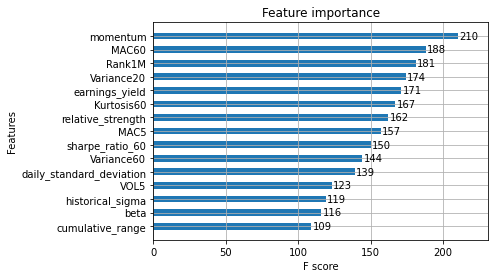

In [21]:
# get importance
plot_importance(booster,
                 height=0.5,
                 max_num_features=15)

# compute the val acc
y_predicted = booster.predict(data_val)
y = data_val.get_label()

accuracy = sum(y == y_predicted )
accuracy_rate = float(accuracy) / len(y_predicted)
print ('sample number：{0}'.format(len(y_predicted)))
print ('true number：{0}'.format(accuracy) )
print ('acc%：{0:.3f}'.format((accuracy_rate)))

In [22]:
#export the ranking and weight to excel
score_dict={}
for importance_type in (['weight']):
    score_dict=booster.get_score(importance_type=importance_type)
score_dict=sorted(score_dict.items(),key=lambda x:x[1],reverse=True)
columns_map = { 0:'features',1:'weights'}
scorelist = pd.DataFrame(list((score_dict)))
scorelist.rename(columns = columns_map,inplace = True)
file_path = pd.ExcelWriter('ranking_weights.xlsx')
scorelist.to_excel(file_path,encoding = 'utf-8',index = True,index_label='ranking')
file_path.save()
    

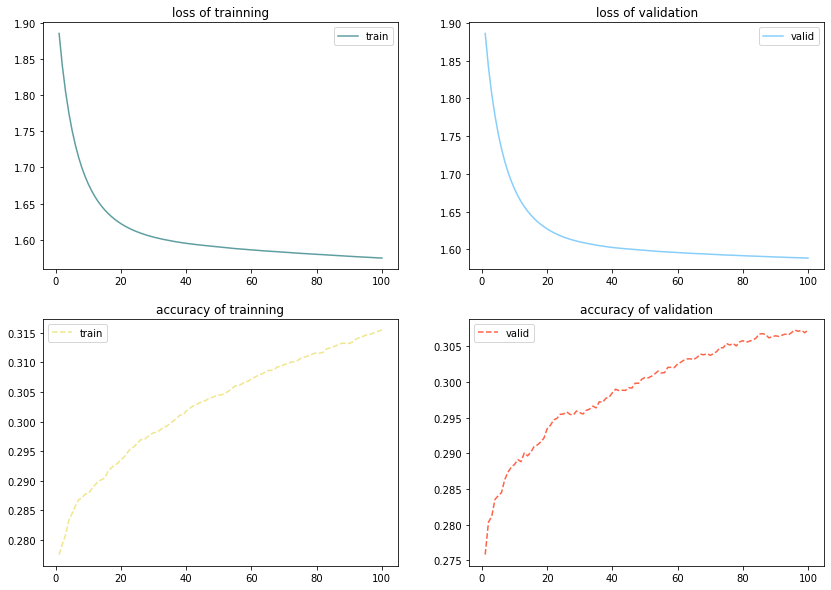

In [23]:
#plot 
#split result and calculate
train_loss=list(evals_result['train'].values())[0]
train_epoch=[i+1 for i in range(len(train_loss))]
train_accu=list(evals_result['train'].values())[1]
train_accu=(1-np.array(train_accu)).tolist()
val_loss=list(evals_result['val'].values())[0]
val_epoch=[i+1 for i in range(len(val_loss))]
val_accu=list(evals_result['val'].values())[1]
val_accu=(1-np.array(val_accu)).tolist()
def draw_graphic(train_loss,train_accu,val_loss,val_accu,train_epoch,val_epoch):
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    plt.title("loss of trainning")
    plt.plot(train_epoch,train_loss,label='train',color='cadetblue')
    plt.legend()
    plt.subplot(222)
    plt.title("loss of validation")
    plt.plot(val_epoch,val_loss,label='valid',color='lightskyblue')
    plt.legend()
    plt.subplot(223)
    plt.title("accuracy of trainning")
    plt.plot(train_epoch,train_accu,label='train',color='khaki',linestyle='--')
    plt.legend()
    plt.subplot(224)
    plt.title("accuracy of validation")
    plt.plot(val_epoch,val_accu,label='valid',color='tomato',linestyle='--')
    plt.legend()
    fig=plt.gcf()
    plt.show()
    return fig
fig=draw_graphic(train_loss,train_accu,val_loss,val_accu,train_epoch,val_epoch)
fig.savefig("./model.jpg")


#setting excel format
def set_style(name,height,bold=False):
    style=xlwt.XFStyle()
    a1=xlwt.Alignment()
    a1.horz=0x02
    a1.vert=0x01
    style.alignment=a1
    font=xlwt.Font()
    font.name=name
    font.bold=bold
    font.color_index=4
    font.height=height
    style.font=font
    return style
#export data
workbook=xlwt.Workbook(encoding='utf-8')
sheet=workbook.add_sheet('sheet_1')    
datalist=['epoch','train_loss','test_loss','train_accuracy','test_accuracy']
for i,data in enumerate(datalist):
    sheet.write(0,i,data,set_style('Arial',240,True))
    sheet.col(i).width=5555
for i in range(0,len(train_epoch)):
    sheet.write(i+1,0,train_epoch[i],set_style('Arial',220,False))
for i in range(0,len(train_epoch)):
    sheet.write(i+1,1,train_loss[i],set_style('Arial',220,False))
for i in range(0,len(train_epoch)):
    sheet.write(i+1,2,val_loss[i],set_style('Arial',220,False))
for i in range(0,len(train_epoch)):
    sheet.write(i+1,3,train_accu[i],set_style('Arial',220,False))
for i in range(0,len(train_epoch)):
    sheet.write(i+1,4,val_accu[i],set_style('Arial',220,False))

workbook.save('./trainData.xls')
    
        

In [24]:
# save the model
booster.save_model('./xgb.model')

### Test

In [25]:
# load model
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model("./xgb.model")

In [26]:
# compute the val acc
data_test = xgb.DMatrix(X_test, y_test)
y_predicted = model_xgb_2.predict(data_test)
y = data_test.get_label()
 
accuracy = sum(y == y_predicted )
accuracy_rate = float(accuracy) / len(y_predicted)
print ('sample number：{0}'.format(len(y_predicted)))
print ('true number：{0}'.format(accuracy) )
print ('acc%：{0:.3f}'.format((accuracy_rate)))

sample number：53089
true number：14048
acc%：0.265


In [27]:
#evaluate
y_true = y
y_pred = y_predicted
judge = classification_report(y_true, y_pred)
print(judge)

              precision    recall  f1-score   support

         1.0       0.29      0.11      0.15      4759
         2.0       0.26      0.50      0.34     11484
         3.0       0.29      0.29      0.29     10911
         4.0       0.34      0.23      0.27     10809
         5.0       0.20      0.20      0.20      9405
         6.0       0.23      0.04      0.07      5721

    accuracy                           0.26     53089
   macro avg       0.27      0.23      0.22     53089
weighted avg       0.27      0.26      0.24     53089



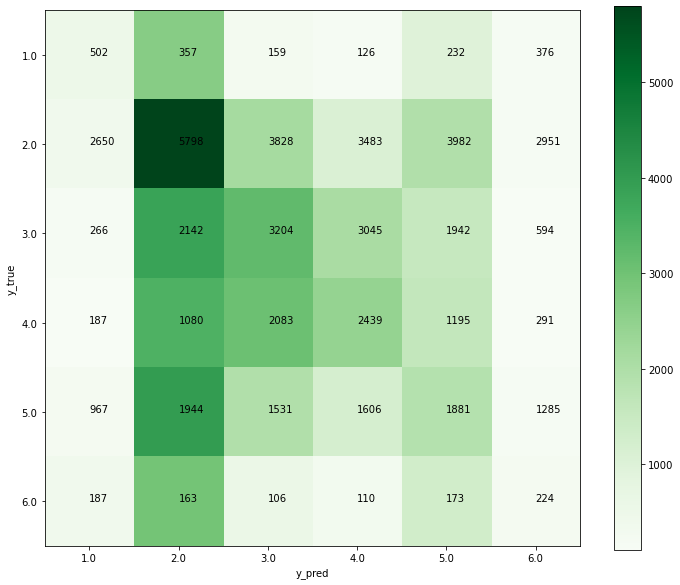

In [29]:
#混淆矩阵的评价
classes = [1.0,2.0,3.0,4.0,5.0,6.0]
confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
plt.imshow(confusion, cmap=plt.cm.Greens)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('y_pred')
plt.ylabel('y_true')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.show()